In [1]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import warnings
warnings.filterwarnings(action='ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

C:\Users\82109\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset=pd.read_csv("EDA_final.csv")
dataset

,Unnamed: 0,sub_id,activity_id,act_level,hand_acc_x_mean,hand_acc_x_std,hand_acc_y_mean,hand_acc_y_std,hand_acc_z_mean,hand_acc_z_std,...,ankle_acc_y_mean,ankle_acc_y_std,ankle_acc_z_mean,ankle_acc_z_std,ankle_gyr_x_mean,ankle_gyr_x_std,ankle_gyr_y_mean,ankle_gyr_y_std,ankle_gyr_z_mean,ankle_gyr_z_std
0,3497,2,4,moderate,-12.040995,3.734766,3.069947,2.591651,1.161251,1.837110,...,0.068395,7.408032,-1.578947,3.224426,-0.089607,1.419706,-0.109581,0.823423,-0.033989,3.099118
1,14495,7,5,vigorous,-3.723040,10.188184,11.705779,17.220389,-1.367870,4.527840,...,4.774907,16.373748,-4.488213,13.319767,0.268098,2.850637,-0.214467,1.461636,0.173994,4.399006
2,14969,8,3,light,-9.275877,0.082824,1.006239,0.153816,2.709588,0.155286,...,-7.266617,0.080816,-1.471347,0.167118,-0.000961,0.039025,0.000421,0.028817,0.005620,0.017938
3,10111,5,5,vigorous,-4.493177,8.047408,9.519502,15.157397,2.644789,4.397889,...,4.253153,14.499693,-4.933189,5.644267,-0.075801,1.656742,-0.067246,1.173186,0.201805,4.822345
4,2422,2,2,light,-1.544933,0.176979,6.506689,0.157476,7.027291,0.151310,...,-2.435107,0.445737,-1.317451,0.891343,0.011485,0.289046,-0.030544,0.149178,0.013118,0.037660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7844,10708,6,2,light,-4.306831,0.087374,1.634235,0.082474,8.393767,0.110314,...,-1.152508,0.070008,-2.747617,0.101630,0.011747,0.025758,-0.006416,0.025480,0.003831,0.015409
7845,4870,3,2,light,-1.545991,0.086820,3.379703,0.093813,8.981813,0.103787,...,0.691999,0.070985,1.310246,0.109423,0.014554,0.024818,-0.000330,0.024905,0.006282,0.016639
7846,11822,6,4,moderate,-10.034760,1.780491,3.100475,1.319988,1.092313,0.994165,...,1.075183,8.284333,-2.815136,3.539439,-0.071975,1.670458,-0.017743,0.454644,0.204427,2.938931
7847,3866,2,4,moderate,-8.275569,3.245008,6.196727,4.417230,2.372815,1.843274,...,0.477373,11.093323,-2.393269,4.751164,0.004726,1.932653,-0.326306,0.950371,0.105722,3.513709


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7849 entries, 0 to 7848
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7849 non-null   int64  
 1   sub_id            7849 non-null   int64  
 2   activity_id       7849 non-null   int64  
 3   act_level         7849 non-null   object 
 4   hand_acc_x_mean   7849 non-null   float64
 5   hand_acc_x_std    7849 non-null   float64
 6   hand_acc_y_mean   7849 non-null   float64
 7   hand_acc_y_std    7849 non-null   float64
 8   hand_acc_z_mean   7849 non-null   float64
 9   hand_acc_z_std    7849 non-null   float64
 10  hand_gyr_x_mean   7849 non-null   float64
 11  hand_gyr_x_std    7849 non-null   float64
 12  hand_gyr_y_mean   7849 non-null   float64
 13  hand_gyr_y_std    7849 non-null   float64
 14  hand_gyr_z_mean   7849 non-null   float64
 15  hand_gyr_z_std    7849 non-null   float64
 16  chest_acc_x_mean  7849 non-null   float64


In [4]:
dataset.isnull().sum()

Unnamed: 0          0
sub_id              0
activity_id         0
act_level           0
hand_acc_x_mean     0
hand_acc_x_std      0
hand_acc_y_mean     0
hand_acc_y_std      0
hand_acc_z_mean     0
hand_acc_z_std      0
hand_gyr_x_mean     0
hand_gyr_x_std      0
hand_gyr_y_mean     0
hand_gyr_y_std      0
hand_gyr_z_mean     0
hand_gyr_z_std      0
chest_acc_x_mean    0
chest_acc_x_std     0
chest_acc_y_mean    0
chest_acc_y_std     0
chest_acc_z_mean    0
chest_acc_z_std     0
chest_gyr_x_mean    0
chest_gyr_x_std     0
chest_gyr_y_mean    0
chest_gyr_y_std     0
chest_gyr_z_mean    0
chest_gyr_z_std     0
ankle_acc_x_mean    0
ankle_acc_x_std     0
ankle_acc_y_mean    0
ankle_acc_y_std     0
ankle_acc_z_mean    0
ankle_acc_z_std     0
ankle_gyr_x_mean    0
ankle_gyr_x_std     0
ankle_gyr_y_mean    0
ankle_gyr_y_std     0
ankle_gyr_z_mean    0
ankle_gyr_z_std     0
dtype: int64

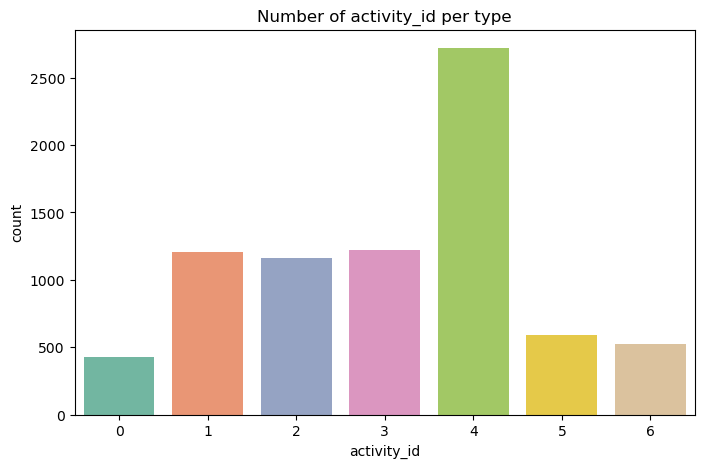

In [5]:
plt.figure(figsize = (8, 5))
sns.countplot(x =dataset["activity_id"], palette="Set2")
plt.title("Number of activity_id per type")
plt.show()

In [6]:
dataset['activity_id'].value_counts()

4    2721
3    1220
1    1203
2    1162
5     593
6     522
0     428
Name: activity_id, dtype: int64

In [14]:
#Frequency distribution of species"
X = dataset.iloc[:,4:40].values
y = dataset['activity_id']


Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [15]:
X

array([[-1.20409946e+01,  3.73476551e+00,  3.06994748e+00, ...,
         8.23423313e-01, -3.39893318e-02,  3.09911803e+00],
       [-3.72303962e+00,  1.01881844e+01,  1.17057789e+01, ...,
         1.46163592e+00,  1.73993702e-01,  4.39900551e+00],
       [-9.27587746e+00,  8.28236915e-02,  1.00623852e+00, ...,
         2.88165986e-02,  5.62000386e-03,  1.79384045e-02],
       ...,
       [-1.00347604e+01,  1.78049128e+00,  3.10047497e+00, ...,
         4.54643643e-01,  2.04426654e-01,  2.93893143e+00],
       [-8.27556929e+00,  3.24500850e+00,  6.19672660e+00, ...,
         9.50370582e-01,  1.05721686e-01,  3.51370885e+00],
       [-3.07699954e+00,  3.85069709e+00,  3.49565794e+00, ...,
         9.58544611e-01,  5.91463820e-02,  2.74098326e+00]])

In [16]:
Y

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [17]:
print("X_train.shape:", X_train.shape)

print("y_train.shape:", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape: (6279, 36)
y_train.shape: (6279, 7)
X_test.shape: (1570, 36)
y_test.shape: (1570, 7)


In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras.optimizers import SGD, Adam

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(40,input_shape=(36,),activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(7,activation='softmax'))

model.compile(Adam(lr=0.00048), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 40)                1480      
                                                                 
 dense_9 (Dense)             (None, 20)                820       
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 7)                 77        
                                                                 
Total params: 2,587
Trainable params: 2,587
Non-trainable params: 0
_________________________________________________________________


In [22]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))

y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
197/197 [==============================] - 2s 7ms/step - loss: 1.1867 - accuracy: 0.5905 - val_loss: 0.7233 - val_accuracy: 0.8153
Epoch 2/100
197/197 [==============================] - 1s 4ms/step - loss: 0.4116 - accuracy: 0.8739 - val_loss: 0.2371 - val_accuracy: 0.9261
Epoch 3/100
197/197 [==============================] - 1s 4ms/step - loss: 0.1739 - accuracy: 0.9527 - val_loss: 0.1297 - val_accuracy: 0.9682
Epoch 4/100
197/197 [==============================] - 1s 4ms/step - loss: 0.1070 - accuracy: 0.9715 - val_loss: 0.0911 - val_accuracy: 0.9720
Epoch 5/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0791 - accuracy: 0.9734 - val_loss: 0.0691 - val_accuracy: 0.9745
Epoch 6/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9753 - val_loss: 0.0564 - val_accuracy: 0.9764
Epoch 7/100
197/197 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9764 - val_loss: 0.0510 - val_accuracy: 0.9752

197/197 [==============================] - 1s 4ms/step - loss: 1.4437e-04 - accuracy: 1.0000 - val_loss: 2.8249e-04 - val_accuracy: 1.0000
Epoch 58/100
197/197 [==============================] - 1s 4ms/step - loss: 1.3604e-04 - accuracy: 1.0000 - val_loss: 2.8247e-04 - val_accuracy: 1.0000
Epoch 59/100
197/197 [==============================] - 1s 4ms/step - loss: 1.2259e-04 - accuracy: 1.0000 - val_loss: 5.5900e-04 - val_accuracy: 1.0000
Epoch 60/100
197/197 [==============================] - 1s 4ms/step - loss: 1.2091e-04 - accuracy: 1.0000 - val_loss: 3.1151e-04 - val_accuracy: 1.0000
Epoch 61/100
197/197 [==============================] - 1s 4ms/step - loss: 1.2158e-04 - accuracy: 1.0000 - val_loss: 2.3403e-04 - val_accuracy: 1.0000
Epoch 62/100
197/197 [==============================] - 1s 4ms/step - loss: 1.1994e-04 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 0.9994
Epoch 63/100
197/197 [==============================] - 1s 5ms/step - loss: 1.0173e-04 - accuracy: 1.0000

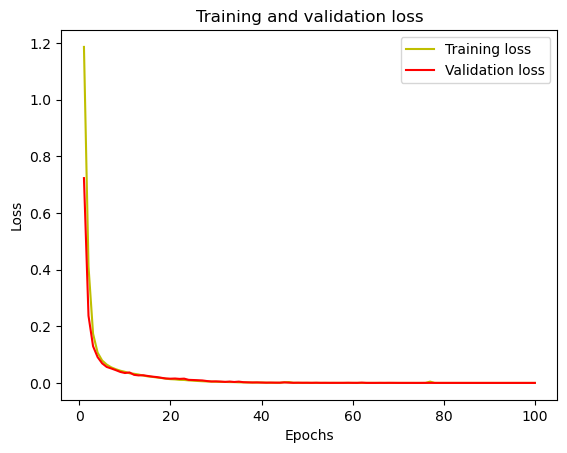

In [23]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

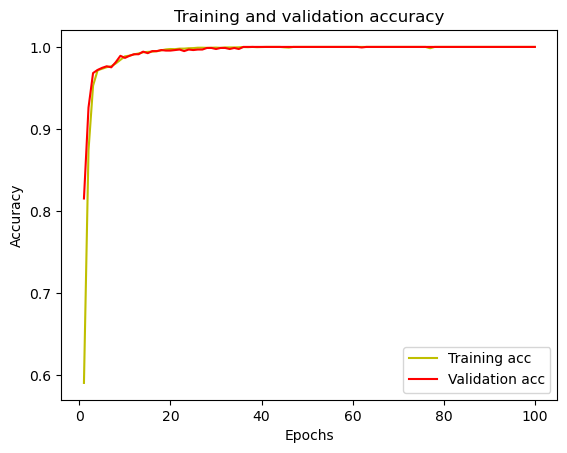

In [24]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

accuracy = np.sum(y_test_class == y_pred_class) / len(y_test_class)
print("Accuracy:", accuracy)

print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       248
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       231
           4       1.00      1.00      1.00       540
           5       1.00      1.00      1.00       114
           6       1.00      1.00      1.00       107

    accuracy                           1.00      1570
   macro avg       1.00      1.00      1.00      1570
weighted avg       1.00      1.00      1.00      1570

[[ 91   0   0   0   0   0   0]
 [  0 248   0   0   0   0   0]
 [  0   0 239   0   0   0   0]
 [  0   0   0 231   0   0   0]
 [  0   0   0   0 540   0   0]
 [  0   0   0   0   0 114   0]
 [  0   0   0   0   0   0 107]]
